In [1]:
%matplotlib inline

In [2]:
from sdclane import config, utility, camera, line_detection, lane_detection


import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
lane_detector = lane_detection.LaneDetector()

/root/anaconda3/lib/python3.5/site-packages/skimage/measure/fit.py:57: skimage_deprecation: `LineModel` is deprecated, use `LineModelND` instead.
  warn(skimage_deprecation('`LineModel` is deprecated, '


In [4]:
test_imgs = utility.read_rgb_imgs(config.test_img_files)

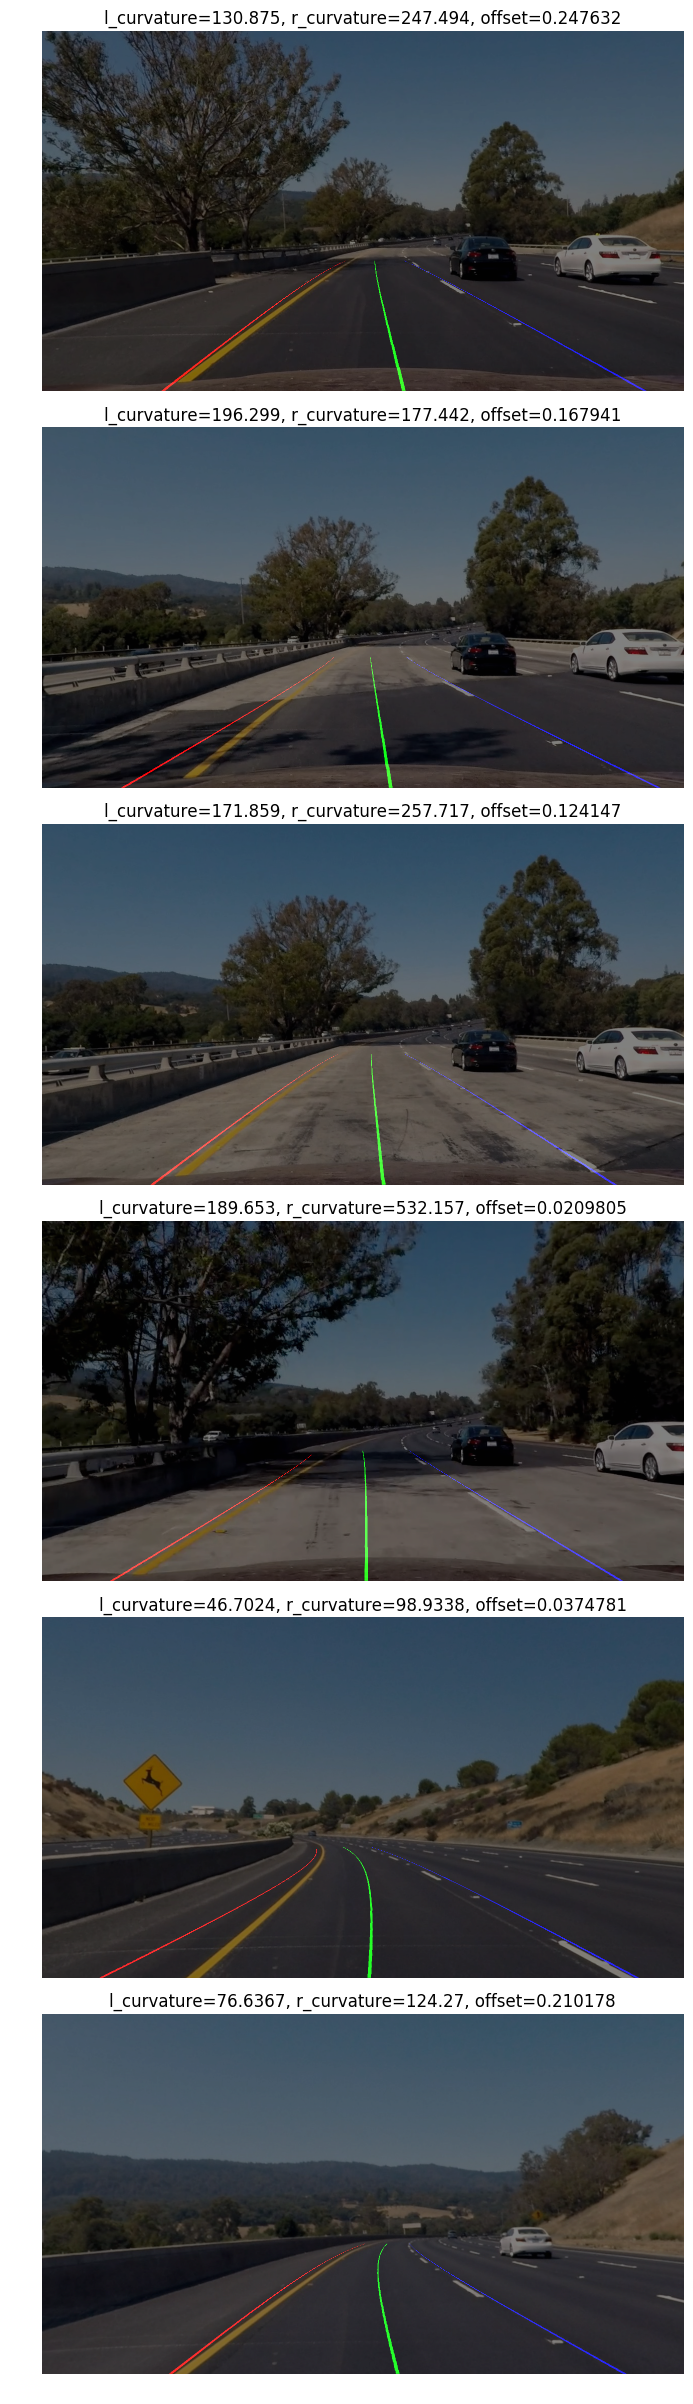

In [5]:
fig, axes = plt.subplots(6, 1, figsize = (8*1, 4*6))
axes=axes.ravel()
fig.tight_layout()
fig.subplots_adjust(wspace = 0.1, hspace=0.1, )


for ax, test_img in zip(axes, test_imgs):
#     ax.imshow(test_img, cmap=plt.cm.gray)
# #     ax[0].set_title("original")
    
#     ax.set_axis_off()
    
    
    (l_curvature, r_curvature, offset), marked_lane_img = lane_detector.detect_lane(test_img)
    ax.set_title("l_curvature=%g, r_curvature=%g, offset=%g" % (l_curvature, r_curvature, offset))
    
    ax.imshow(marked_lane_img)
    ax.set_axis_off()
    
#     ax[1].imshow(test_img, cmap=plt.cm.gray)
#     ax[1].scatter(mxs, mys, marker="o", color="red")
#     ax[1].scatter(lxs, lys, marker="o", color="blue")
#     ax[1].scatter(rxs, rys, marker="o", color="green")

#     y_span = range(0, test_img.shape[0]+1)
#     lxhat = np.polyval(lmodel, y_span)
#     mxhat = np.polyval(mmodel, y_span)
#     rxhat = np.polyval(rmodel, y_span)
    
#     lane_img = np.zeros_like(test_img, dtype=np.uint8)
#     for xs, col in zip([lxhat.astype(np.int32), mxhat.astype(np.int32), rxhat.astype(np.int32)], 
#                        [(255,0,0), (0,255,0), (0,0,255)]):
#         pts = np.array([(x, y) for x, y in zip(xs, y_span)])
#         lane_img = cv2.polylines(lane_img, [pts], isClosed=False, color=col, thickness=5)

#     lane_img = lane_detector.transformer.transform(lane_img, inverse=True)
#     lane_img = cv2.addWeighted(test_img, 0.5, lane_img, 1.5, 1)
#     ax[1].imshow(lane_img)
#     ax[1].set_title("curvature=%g, offset=%g" % (curvature, offset))

In [6]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [7]:

def process_image(image):
    (l_curvature, r_curvature, offset), marked_lane_img = lane_detector.detect_lane(image)
    return marked_lane_img

In [12]:

clip_output_file = 'marked_challenge_video.mp4'
clip = VideoFileClip("challenge_video.mp4")
clip_output = clip.fl_image(process_image) #NOTE: this function expects color images!!
%time clip_output.write_videofile(clip_output_file, audio=False)

[MoviePy] >>>> Building video marked_challenge_video.mp4
[MoviePy] Writing video marked_challenge_video.mp4


100%|██████████| 485/485 [12:47<00:00,  1.61s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: marked_challenge_video.mp4 

CPU times: user 1h 8min 54s, sys: 2min 14s, total: 1h 11min 8s
Wall time: 12min 48s


In [8]:

clip_output_file = 'marked_project_video.mp4'
clip = VideoFileClip("project_video.mp4").subclip(0, 10)
clip_output = clip.fl_image(process_image) #NOTE: this function expects color images!!
%time clip_output.write_videofile(clip_output_file, audio=False)

[MoviePy] >>>> Building video marked_project_video.mp4
[MoviePy] Writing video marked_project_video.mp4


100%|█████████▉| 250/251 [06:46<00:01,  1.60s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: marked_project_video.mp4 

CPU times: user 35min 11s, sys: 1min 8s, total: 36min 19s
Wall time: 6min 47s


In [10]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(clip_output_file))